In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime as dt
import time
from pathlib import Path



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

cwd = os.getcwd()

print( "Current Path:", cwd )

os.chdir('../data')

cwd = os.getcwd()
print( "Current Path:", cwd )

for dirname, _, filenames in os.walk( os.getcwd() + '/parquet'):
    
    # print( os.getcwd() + '/data/parquet' )
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Current Path: c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data
Current Path: c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-01.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-02.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-03.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-04.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-05.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-06.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-07.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-08.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-taxi-fare-prediction\data/parquet\yellow_tripdata_2023-09.parquet
c:\GIT\GitHub-Taxi\Dev\nyc-ta

In [35]:

data_dir = Path( os.getcwd() +'/parquet/')

# 2023 trip data dataframe
tripdata_2023_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)


In [36]:
zones_lookup_df = pd.read_csv( os.getcwd() +'/taxi_zone_lookup.csv')
zones_lookup_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [37]:
zones_lookup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [38]:
shap0 = zones_lookup_df.shape
print(f'Number of rows: {shap0[0]} and Number of columns: {shap0[1]}')

Number of rows: 265 and Number of columns: 4


# 2023-December Yellow Trip Data 

In [39]:
tripdata_df = pd.read_parquet(os.getcwd() +'/parquet/yellow_tripdata_2023-12.parquet')
tripdata_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.0,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.3,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.5,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.4,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0


In [40]:
tripdata_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3376562,2,2023-12-31 23:04:34,2023-12-31 23:13:58,NaN,1.34,NaN,None,233,163,0,12.08,0.0,0.5,0.0,0.0,1.0,16.08,NaN,NaN
3376563,2,2023-12-31 23:08:15,2023-12-31 23:08:23,NaN,0.00,NaN,None,48,48,0,25.98,0.0,0.5,0.0,0.0,1.0,27.48,NaN,NaN
3376564,2,2023-12-31 23:16:15,2023-12-31 23:30:28,NaN,3.71,NaN,None,196,198,0,16.68,0.0,0.5,0.0,0.0,1.0,18.18,NaN,NaN
3376565,2,2023-12-31 23:21:58,2023-12-31 23:34:29,NaN,5.20,NaN,None,140,148,0,19.64,0.0,0.5,0.0,0.0,1.0,23.64,NaN,NaN
3376566,2,2023-12-31 23:10:47,2023-12-31 23:27:58,NaN,6.81,NaN,None,237,261,0,27.18,0.0,0.5,0.0,0.0,1.0,31.18,NaN,NaN


In [41]:
tripdata_df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [42]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376567 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [43]:
tripdata_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [44]:
shap = tripdata_df.shape
print(f'Number of rows: {shap[0]} and Number of columns: {shap[1]}')

Number of rows: 3376567 and Number of columns: 19


In [45]:
tripdata_df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          180003
trip_distance                 0
RatecodeID               180003
store_and_fwd_flag       180003
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     180003
Airport_fee              180003
dtype: int64

In [46]:
tripdata_df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          180003
trip_distance                 0
RatecodeID               180003
store_and_fwd_flag       180003
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     180003
Airport_fee              180003
dtype: int64

In [47]:
tripdata_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.376567e+06,3376567,3376567,3.196564e+06,3.376567e+06,3.196564e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.196564e+06,3.196564e+06
mean,1.750038e+00,2023-12-15 04:52:38.915836,2023-12-15 05:10:48.484536,1.408162e+00,3.676258e+00,1.793480e+00,1.650829e+02,1.639242e+02,1.169011e+00,1.966690e+01,1.477652e+00,4.828689e-01,3.517045e+00,5.766042e-01,9.758713e-01,2.854158e+01,2.269969e+00,1.370205e-01
min,1.000000e+00,2002-12-31 22:16:54,2003-01-01 15:02:08,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-8.000000e+01,-7.000000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-12-07 23:42:14,2023-12-07 23:58:36.500000,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-12-14 17:55:22,2023-12-14 18:17:28,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.140000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-12-21 15:34:58,2023-12-21 15:56:21,2.000000e+00,3.250000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.330000e+01,2.500000e+00,5.000000e-01,4.500000e+00,0.000000e+00,1.000000e+00,3.156000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-01-03 19:42:57,2024-01-03 20:15:55,9.000000e+00,1.617261e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.320110e+03,5.168000e+01,4.217000e+01,4.174000e+03,1.613800e+02,1.000000e+00,4.269160e+03,2.500000e+00,1.750000e+00
std,4.358471e-01,NaN,NaN,9.109082e-01,1.541572e+02,8.331995e+00,6.430205e+01,6.966056e+01,5.956539e-01,1.896329e+01,1.813181e+00,1.205828e-01,4.727680e+00,2.232990e+00,2.169682e-01,2.383694e+01,8.078145e-01,4.799781e-01


# 2023 Yellow Trip Data

In [48]:
tripdata_2023_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


In [49]:
tripdata_2023_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
3376562,2,2023-12-31 23:04:34,2023-12-31 23:13:58,NaN,1.34,NaN,None,233,163,0,12.08,0.0,0.5,0.0,0.0,1.0,16.08,NaN,NaN,NaN
3376563,2,2023-12-31 23:08:15,2023-12-31 23:08:23,NaN,0.00,NaN,None,48,48,0,25.98,0.0,0.5,0.0,0.0,1.0,27.48,NaN,NaN,NaN
3376564,2,2023-12-31 23:16:15,2023-12-31 23:30:28,NaN,3.71,NaN,None,196,198,0,16.68,0.0,0.5,0.0,0.0,1.0,18.18,NaN,NaN,NaN
3376565,2,2023-12-31 23:21:58,2023-12-31 23:34:29,NaN,5.20,NaN,None,140,148,0,19.64,0.0,0.5,0.0,0.0,1.0,23.64,NaN,NaN,NaN
3376566,2,2023-12-31 23:10:47,2023-12-31 23:27:58,NaN,6.81,NaN,None,237,261,0,27.18,0.0,0.5,0.0,0.0,1.0,31.18,NaN,NaN,NaN


In [50]:
shape_2023_df = tripdata_2023_df.shape
print(f'Number of rows: {shape_2023_df[0]} and Number of columns: {shape_2023_df[1]}')

Number of rows: 38310226 and Number of columns: 20


In [51]:
tripdata_2023_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

In [52]:
tripdata_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38310226 entries, 0 to 3376566
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            flo

In [53]:
tripdata_2023_df.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
airport_fee              35315203
Airport_fee               4304379
dtype: int64

In [54]:
tripdata_2023_df.isna().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
airport_fee              35315203
Airport_fee               4304379
dtype: int64

In [55]:
tripdata_2023_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,3.831023e+07,38310226,38310226,3.700087e+07,3.831023e+07,3.700087e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.700087e+07,2.995023e+06,3.400585e+07
mean,1.738894e+00,2023-07-02 22:47:58.448232,2023-07-02 23:04:41.459181,1.370426e+00,4.088946e+00,1.641906e+00,1.651755e+02,1.639500e+02,1.184585e+00,1.952225e+01,1.556057e+00,4.856167e-01,3.522265e+00,5.897361e-01,9.794487e-01,2.846194e+01,2.264610e+00,1.074086e-01,1.429429e-01
min,1.000000e+00,2001-01-01 00:06:49,1970-01-20 10:16:32,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-4.110000e+02,-9.130000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.250000e+00,-1.750000e+00
25%,1.000000e+00,2023-04-02 18:25:17,2023-04-02 18:43:06.250000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.595000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 18:43:55,2023-06-27 18:59:09,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 21:55:14,2023-10-06 22:11:37,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.410000e+00,0.000000e+00,1.000000e+00,3.072000e+01,2.500000e+00,0.000000e+00,0.000000e+00
max,6.000000e+00,2024-01-03 19:42:57,2024-01-03 20:15:55,9.000000e+00,3.457294e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.000250e+04,5.316000e+01,4.174000e+03,6.655600e+02,1.000000e+00,3.869876e+05,2.750000e+00,1.250000e+00,1.750000e+00
std,4.443591e-01,NaN,NaN,8.925924e-01,2.412509e+02,7.427351e+00,6.399765e+01,6.985543e+01,5.562740e-01,7.572729e+01,2.450399e+00,1.095629e-01,4.147060e+00,2.200999e+00,1.991462e-01,7.712821e+01,7.971481e-01,3.556511e-01,4.772075e-01


# MAP ZONE LOCATION PORTION

In [56]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [57]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [58]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

In [59]:
def draw_region_map(ax, sf, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_x = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    reg_y = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) 
        #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) 
            #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [60]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) 
        #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')            
        elif len(text) != 0 and loc_id in text:
            #plt.text(x+0.01, y-0.01, str(loc_id), fontsize=12, color="white", bbox=dict(facecolor='black', alpha=0.5))
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [61]:
sf = shapefile.Reader( os.getcwd() + "/taxi_zones/taxi_zones.shp" )
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")
df_loc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936


In [62]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    271 non-null    int64  
 1   Shape_Leng  271 non-null    float64
 2   Shape_Area  271 non-null    float64
 3   zone        271 non-null    object 
 4   LocationID  271 non-null    int64  
 5   borough     271 non-null    object 
 6   longitude   271 non-null    float64
 7   latitude    271 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 19.1+ KB


In [63]:
shap_loc = df_loc.shape
print(f'Number of rows: {shap_loc[0]} and Number of columns: {shap_loc[1]}')

Number of rows: 271 and Number of columns: 8


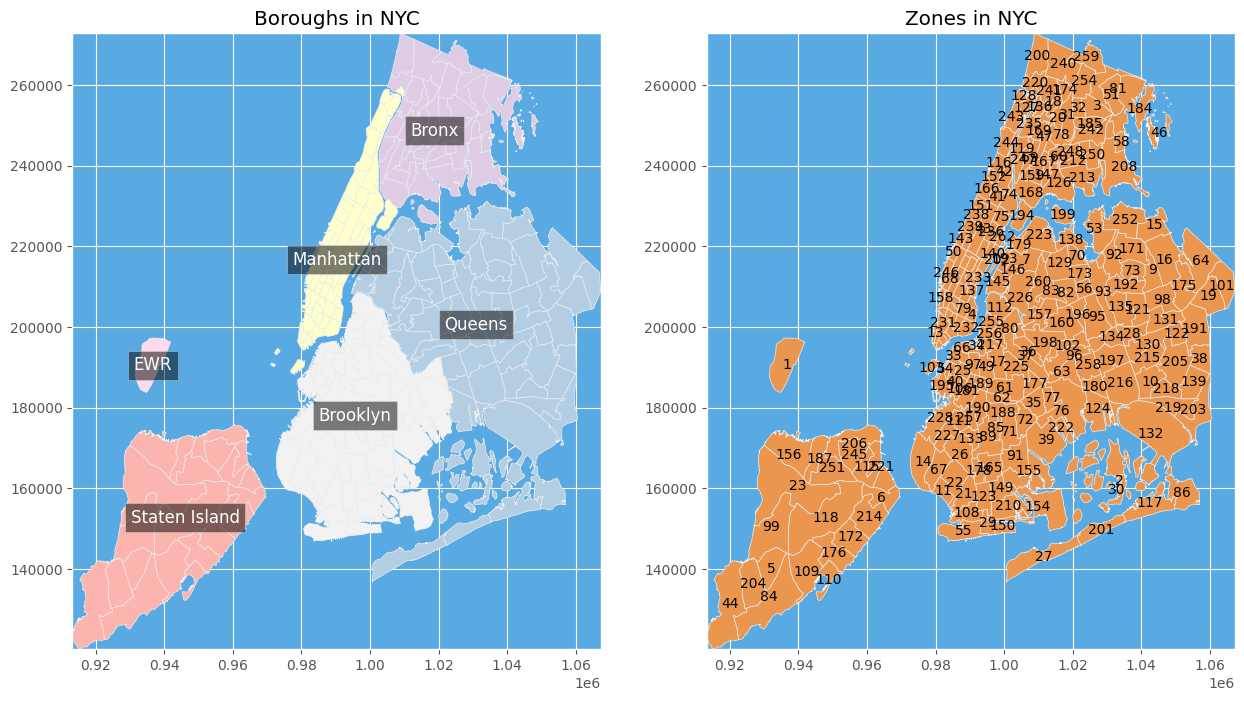

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf)


ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf)
